In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
np.warnings.filterwarnings('ignore')

<h1>1.2.1 Generate data and get an overview of the data</h1>

In [35]:
# Generate a vector of random numbers (20 observations of 2 features) and split into two classes
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] + 1

Text(0, 0.5, 'X2')

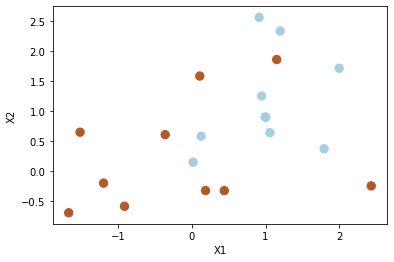

In [36]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

<h1>1.2.2 Learn and assess an support vector (soft margine) classifier</h1>

In [37]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
# Helper function for plotting SVM
# method taken from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab15-py.html
def svc_plot(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Vertical lines in plot - support vectors
    sup_vec = svc.support_vectors_
    plt.scatter(sup_vec[:,0], sup_vec[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Support vectors: ', svc.support_.size)

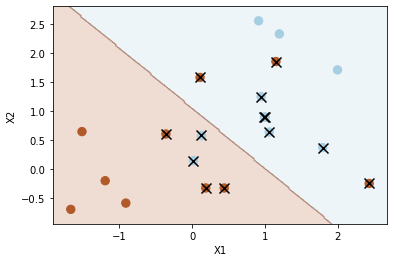

Support vectors:  13


In [39]:
svc_plot(svc, X, y)

In [40]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

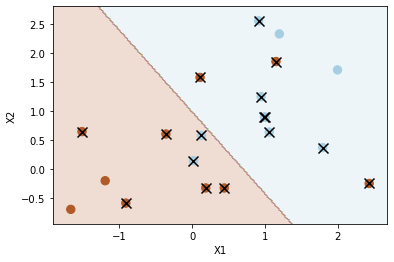

Support vectors:  16


In [41]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
svc_plot(svc2, X, y)

In [42]:
svc2.support_

array([10, 11, 13, 14, 15, 16, 17, 19,  0,  1,  2,  3,  4,  6,  8,  9])

<h2>Interpretation</h2>

It is visible that in the first plot there are 13 support vectors and in the second plot 16 support vectors. For both plots a linear kernel was used, however for the first one the cost was 10 and for the second the cost was 0.1  
Since a smaller cost was used, we get the larger amount of support vectors, since the margin is here wider.  

In [43]:
# Cross-validation by selecting an optimal cost parameter
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
model = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
model.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [44]:
model.cv_results_

{'mean_fit_time': array([0.00084233, 0.00080147, 0.00060127, 0.00019975, 0.        ,
        0.00049884, 0.00050361]),
 'std_fit_time': array([0.00044259, 0.00040087, 0.00049102, 0.00039949, 0.        ,
        0.00049884, 0.00050377]),
 'mean_score_time': array([0.00035484, 0.00029595, 0.00059512, 0.00079775, 0.00059915,
        0.00039968, 0.00019939]),
 'std_score_time': array([0.000451  , 0.00045216, 0.00048601, 0.00039887, 0.00048943,
        0.00048952, 0.00039878]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1

<h2>Interpretation</h2>

With cv_results_ we access the cross-validation errors for the models. From the printed results we can already see that with a cost of 0.001, 0.01 and 0.1 the mean_test_score is 0.8 in all three cases, the std_test_score is 0.245 for all three cases and a rank_test_score of 1 for all three cases again. Further we can also point out the best parameters as follows with best_params_

In [45]:
model.best_params_

{'C': 0.001}

In [46]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [47]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


<h2>Interpretation</h2>

A test data set was generated with any values and later the prediction was performed, here the best model was used with the parameters obtained from the cross-validation.  
As a result 14 test observations were correctly classified and 6 errors, thus the accuracy score is 70\%

<h1>1.2.3 Learn and assess an SVM classifier</h1>

Text(0, 0.5, 'X2')

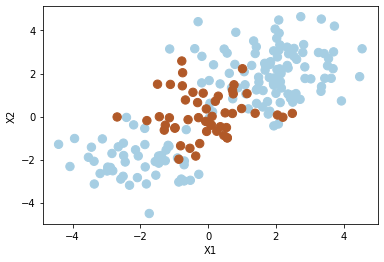

In [85]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

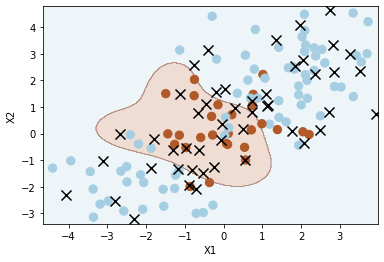

Support vectors:  51


In [86]:
svm = SVC(C=1, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
svc_plot(svm, X_test, y_test)

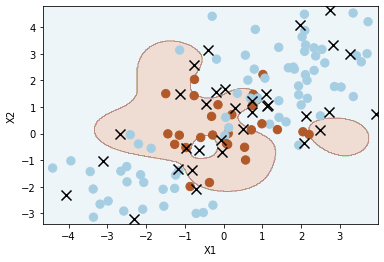

Support vectors:  36


In [87]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
svc_plot(svm2, X_test, y_test)

In [88]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
model = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
model.fit(X_train, y_train)
model.best_params_

{'C': 10, 'gamma': 0.5}

<h2>Interpretation</h2>

By looking at the first plot it is visible that there is already a certain amount of training errors. For the second plot the cost has been increased to 100. The best parameters according to cross-validation has a cost of 10 and a gamma of 0.5.

In [89]:
#plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, model.best_estimator_.predict(X_test)))
print(model.best_estimator_.score(X_test, y_test))

[[66  7]
 [ 6 21]]
0.87


<h2>Interpretation</h2>

By using cross-validation where we found out the best parameters, from the conclusion matrix and the score it is visible that 87\% of test observations are correctly classified here.

<h1>1.2.4 Learn and assess an SVM classifier for multiple classes</h1>

Text(0, 0.5, 'XX2')

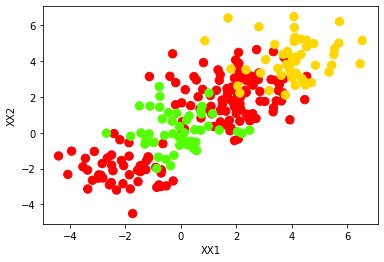

In [80]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

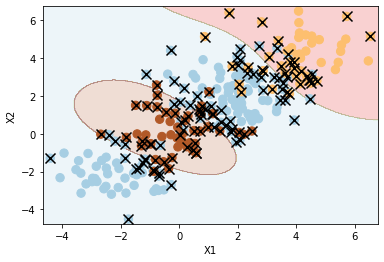

Support vectors:  128


In [81]:
svm3 = SVC(C=1, kernel='rbf')
svm3.fit(XX, yy)
svc_plot(svm3, XX, yy)

In [82]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
model = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
model.fit(X_train, y_train)
model.best_params_

{'C': 10, 'gamma': 0.5}

In [83]:
np.random.seed(8)
X_test =  np.vstack([X, np.random.randn(50,2)])
y_test = np.hstack([y, np.repeat(0,50)])
X_test[y_test ==0] = X_test[y_test == 0] +4

In [79]:
svc2 = SVC(C=10, kernel='rbf')
svc2.fit(XX, yy)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,0,1
-1,139,4,7
0,8,42,0
1,12,0,38


<h2>Interpretation</h2>

Since we have now more than two levels, multi-class classification is performed. A test data set was generated with same values and later the prediction was performed, here the best model was used with the parameters obtained from the cross-validation.
As a result with the suggested cost value, 219 test observations out of 250 were correctly classified. Thus the accuracy is 87.6\%

<h1>1.2.5 Apply SVM to Gene Expression Data</h1>

In [90]:
X_train = pd.read_csv('ISLR/data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('ISLR/data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('ISLR/data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('ISLR/data/Khan_ytest.csv').drop('Unnamed: 0', axis=1)

In [91]:
X_train.shape

(63, 2308)

In [92]:
X_test.shape

(20, 2308)

In [87]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
2,-0.084469,-1.649739,-0.241307,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,-2.683846,-2.117767,-0.523236,-2.174192,-0.448947,0.543022,1.338731,0.194250,0.599276,0.637370,...,-1.681471,-1.036765,-0.422204,-1.400799,-2.831914,-4.667046,-2.354932,-1.220102,-0.435100,-1.444771
59,-1.207646,-2.478130,0.094310,0.273456,-1.113218,-0.283690,1.105985,0.801284,0.381582,0.714811,...,-0.929629,-0.258512,-1.482365,-0.827136,-1.543182,-1.549755,-0.532730,-1.759099,0.570471,-2.232127
60,-1.684161,-2.053384,0.563835,0.314446,-2.052605,-0.630172,1.570967,0.137324,1.036985,0.973654,...,-0.537683,-0.497909,-0.477552,-1.427950,-1.928955,-2.544657,-1.080576,-1.382302,-0.804973,-1.318262
61,-2.258568,-2.308603,-1.443076,0.233094,-1.779633,-0.030665,1.532665,-0.408419,0.795162,0.376242,...,-2.276917,-0.245517,-0.815315,-1.288079,-2.835316,-2.169804,-0.630172,-0.870839,-0.315533,-1.326140


In [90]:
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_data = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_data)

   1   2   3   4
1  8   0   0   0
2  0  23   0   0
3  0   0  12   0
4  0   0   0  20


In [94]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_data = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_data)

   1  2  3  4
1  3  0  0  0
2  0  6  2  0
3  0  0  4  0
4  0  0  0  5


<h2>Interpretation</h2>

From the first confusion matrix it is visible that there are no training errors. The hyperplanes that separate the classes were easy to find which can be noticed already since the number of variables is large relative to the number of observations. This suggests also that the performance on the test observations is more interesting than the performance of the training observations. And therefore the last confusion matrix is a prediction on the test observations.  
Confusion matrix on training observation shows 63 correct prediction and 0 errors, thus 100\% accuracy. Confusion matrix on testing observations shows 18 correct observations and two errors. It is visible that using the cost 10, two test set errors occur on this data. Thus, the accuracy score on the testing data is 90\%.